In [1]:
library('caret')
library('MASS')
library('rpart')

Loading required package: ggplot2

Loading required package: lattice



In [2]:
df <- read.table("Sparrow_data.txt",header = TRUE)
df <- df[,-1]

In [3]:
head(df)

,sex,age,survival,length,alar,weight,head,humerus,femur,tibiotarsus,skull,keel
,<chr>,<chr>,<lgl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,m,a,TRUE,154,241,24.5,31.2,0.687,0.668,1.022,0.587,0.830
2,m,a,FALSE,165,240,26.5,31.0,0.738,0.704,1.095,0.606,0.847
3,m,a,FALSE,160,245,26.1,32.0,0.736,0.709,1.109,0.611,0.842
4,m,a,TRUE,160,252,26.9,30.8,0.736,0.709,1.180,0.602,0.841
5,m,a,TRUE,155,243,26.9,30.6,0.733,0.704,1.151,0.602,0.846
6,m,a,FALSE,161,249,25.6,32.3,0.743,0.718,1.128,0.602,0.828


In [10]:
df[sapply(df, is.factor)] <- data.matrix(df[sapply(df, is.factor)])

In [5]:
prop.table(table(df$sex))


        f         m 
0.3602941 0.6397059 

In [6]:
set.seed(4)
train_indices <- createDataPartition(df$sex, p = 0.7, list = FALSE)
train <- df[train_indices, ]
test <- df[-train_indices, ]
prop.table(table(train$sex))


        f         m 
0.3645833 0.6354167 

# LDA

In [7]:
model_1 <- lda(sex ~.,data = train)
model_1

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


Call:
lda(sex ~ ., data = train)

Prior probabilities of groups:
        f         m 
0.3645833 0.6354167 

Group means:
       agea      agey survivalTRUE   length     alar   weight     head
f 0.0000000 0.0000000    0.4000000 157.8857 241.5143 24.96857 31.47429
m 0.6885246 0.3114754    0.5737705 160.4426 247.3115 25.82787 31.65246
    humerus     femur tibiotarsus  skull      keel
f 0.7263143 0.7102571    1.136600 0.6006 0.8185429
m 0.7333443 0.7133770    1.131705 0.6030 0.8511803

Coefficients of linear discriminants:
                      LD1
agea           0.23010810
agey          -0.23010810
survivalTRUE   0.91254433
length         0.07587057
alar           0.20166672
weight         0.31565803
head          -0.11422399
humerus      -21.75999095
femur         -2.40883614
tibiotarsus  -13.94443342
skull        -18.32390122
keel          10.51363976

In [11]:
pred1 <- predict(model_1,test)$class
table_results <- table(Actual = test$sex, Predicted = pred1)
table_results

      Predicted
Actual  f  m
     f 10  4
     m  2 24

In [13]:
precisionf <- table_results["f", "f"] / sum(table_results[, "f"])

recallf <- table_results["f", "f"] / sum(table_results["f", ])
cat("\nPrecision female:", precisionf)
cat("\nRecall female",recallf)

precisionm <- table_results["m", "m"] / sum(table_results[, "m"])
recallm <- table_results["m", "m"] / sum(table_results["m", ])
cat("\nPrecision male:",precisionm)
cat("\nRecall male:",recallm)


Precision female: 0.8333333
Recall female 0.7142857
Precision male: 0.8571429
Recall male: 0.9230769

recall  = TP/(TP+FN)
precision = TP/(TP+FP)

Бачимо тут погану погані метрики для того, щоб прогнозувати і використовувати в подальшому цю модель. Спробуємо інші 

Спробуємо без параметрів age

In [14]:
model_11 <- lda(sex ~.-age,data = train)
pred12 <- predict(model_11,test)$class
table_results <- table(Actual = test$sex, Predicted = pred12)
table_results

      Predicted
Actual  f  m
     f 10  4
     m  3 23

Як ми бачимо age ніяк не впливає на нашу модель.


# QDA

In [15]:
model_2 <- qda(sex ~.-age ,data = train)
model_2

Call:
qda(sex ~ . - age, data = train)

Prior probabilities of groups:
        f         m 
0.3645833 0.6354167 

Group means:
  survivalTRUE   length     alar   weight     head   humerus     femur
f    0.4000000 157.8857 241.5143 24.96857 31.47429 0.7263143 0.7102571
m    0.5737705 160.4426 247.3115 25.82787 31.65246 0.7333443 0.7133770
  tibiotarsus  skull      keel
f    1.136600 0.6006 0.8185429
m    1.131705 0.6030 0.8511803

In [17]:
pred2 <- predict(model_2,test)$class
table_results <- table(Actual = test$sex, Predicted = pred2)
table_results

      Predicted
Actual  f  m
     f 11  3
     m  4 22

In [16]:
precisionmf <- table_results["f", "f"] / sum(table_results[, "f"])

recallmf <- table_results["f", "f"] / sum(table_results["f", ])
cat("\nPrecision female:", precisionmf)
cat("\nRecall female",recallmf)

precisionmm <- table_results["m", "m"] / sum(table_results[, "m"])
recallmm <- table_results["m", "m"] / sum(table_results["m", ])
cat("\nPrecision male:",precisionmm)
cat("\nRecall male:",recallmm)


Precision female: 0.7692308
Recall female 0.7142857
Precision male: 0.8518519
Recall male: 0.8846154

Судячи зі всього у нас доволі непогано покращились основні метрики для прогнозування жіночої статі, але це сталось за рахунок гіршого прогнозування чоловічого

# Tree

In [18]:
tree <-rpart(sex~.-age,data = train,method = 'class')

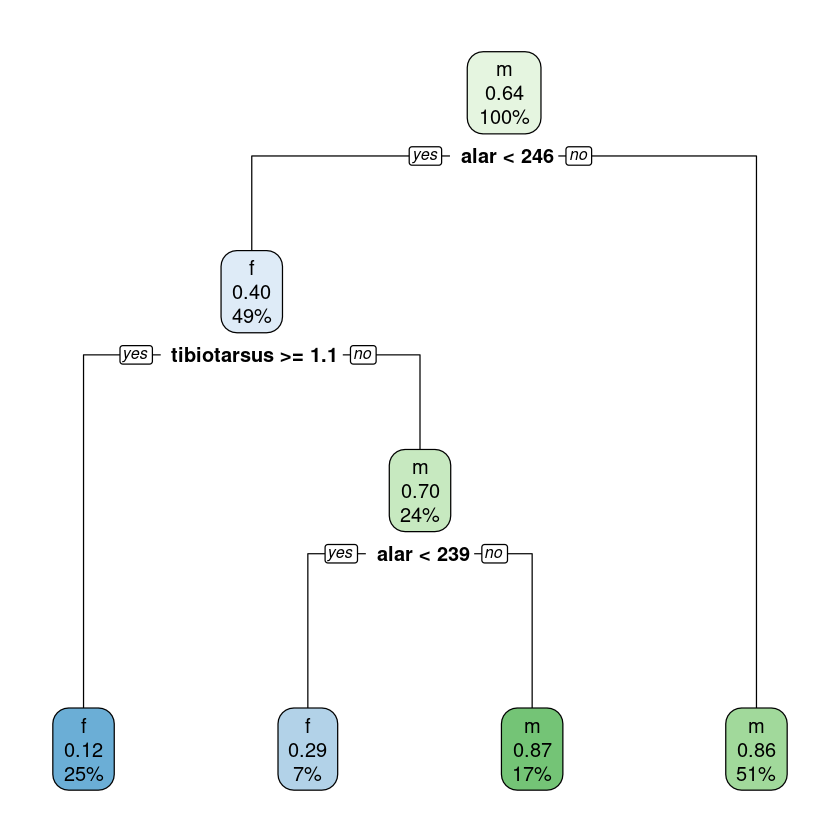

In [19]:
library('rpart.plot')
rpart.plot(tree, yesno = 2, fallen.leaves = TRUE)

In [30]:
tree_pred <- predict(tree,newdata=test,type ='class')
table_results <- table(Actual = test$sex, Predicted = tree_pred)
table_results

      Predicted
Actual  f  m
     f  8  6
     m  7 19

In [31]:
precisionmf <- table_results["f", "f"] / sum(table_results[, "f"])

recallmf <- table_results["f", "f"] / sum(table_results["f", ])
cat("\nPrecision female:", precisionmf)
cat("\nRecall female",recallmf)

precisionmm <- table_results["m", "m"] / sum(table_results[, "m"])
recallmm <- table_results["m", "m"] / sum(table_results["m", ])
cat("\nPrecision male:",precisionmm)
cat("\nRecall male:",recallmm)


Precision female: 0.5333333
Recall female 0.5714286
Precision male: 0.76
Recall male: 0.7307692

Ми спробували спрогнозувати трьома моделями -> найкраще впоралась модель QDA.